# Data Mining and Big Data Analytics - Notebook 1
### Instructor: Prof. Márton Karsai

### References:
* **scikit-learn tutorial** at [SciPy 2017](https://github.com/amueller/scipy-2017-sklearn) by [Alexandre Gramfort](http://http://alexandre.gramfort.net/)  [@agramfort](https://twitter.com/agramfort) (Inria, Université Paris-Saclay) and [Andreas Mueller](http://amuller.github.io) [@amuellerml](https://twitter.com/amuellerml) (Columbia University). See the book [Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do) for more details. 
* **Data Mining, Statistical Modeling and Machine Learning** class by Dr. Ciro Cattuto, Dr. Laetitia Gauvin, Dr. André Panisson (ISI Foundation, Turi, Italy)

### Install requires python libraries

We use pip but the same works for "conda".

>pip install scipy

>pip install scikit-learn

>pip install pandas

>pip install matplotlib

# Representation and Visualization of Data

Data mining is about fitting models to data; for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on a matplotlib examples and show some
examples of how to visualize data.

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being "zeros" for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than NumPy arrays.

We represent samples (data points or instances) as rows in the data array, and we store the corresponding features, the "dimensions," as columns.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different iris flower species.  There are three different species of iris
in this particular dataset as illustrated below:

<h4>Iris Setosa</h4>
<img src="images/iris_setosa.jpg" width="300px">

<h4>Iris Versicolor</h4>
<img src="images/iris_versicolor.jpg" width="300px">

<h4>Iris Virginica</h4>
<img src="images/iris_virginica.jpg" width="300px">



### Quick Question:

**Let's assume that we are interested in categorizing new observations; we want to predict whether unknown flowers are  Iris-Setosa, Iris-Versicolor, or Iris-Virginica flowers, respectively. Based on what we've discussed in the previous section, how would we construct such a dataset?***

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number *j* must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

For future experiments with machine learning algorithms, we recommend you to bookmark the [UCI machine learning repository](http://archive.ics.uci.edu/ml/), which hosts many of the commonly used datasets that are useful for benchmarking machine learning algorithms -- a very popular resource for machine learning practioners and researchers. Conveniently, some of these datasets are already included in scikit-learn so that we can skip the tedious parts of downloading, reading, parsing, and cleaning these text/CSV files. You can find a list of available datasets in scikit-learn at: http://scikit-learn.org/stable/datasets/#toy-datasets.

For example, scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="images/petal_sepal.jpg" alt="Sepal" style="width: 300px;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [1]:
# just used to improve the screen resolution of matplotlib plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\molda\AppData\Local\Temp/ipykernel_20504/4188449582.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [7]:
iris.keys()
iris.DESCR.split('\n')

['.. _iris_dataset:',
 '',
 'Iris plants dataset',
 '--------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '                ',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    pe

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [8]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [9]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [10]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

Using the NumPy's bincount function (above), we can see that the classes are distributed uniformly in this dataset - there are 50 flowers from each species, where

- class 0: Iris-Setosa
- class 1: Iris-Versicolor
- class 2: Iris-Virginica

These class names are stored in the last attribute, namely ``target_names``:

In [12]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [13]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


This data is four dimensional, but we can visualize one or two of the dimensions
at a time using a simple histogram or scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

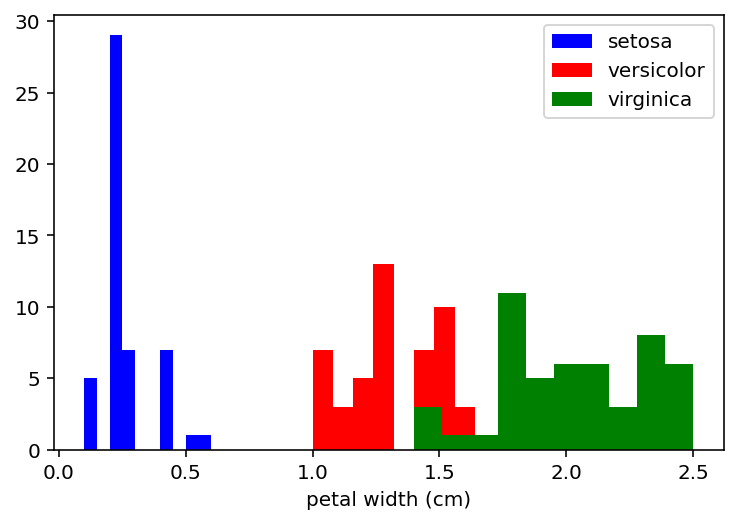

In [39]:
x_index = 3 # Petal width (cm)
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

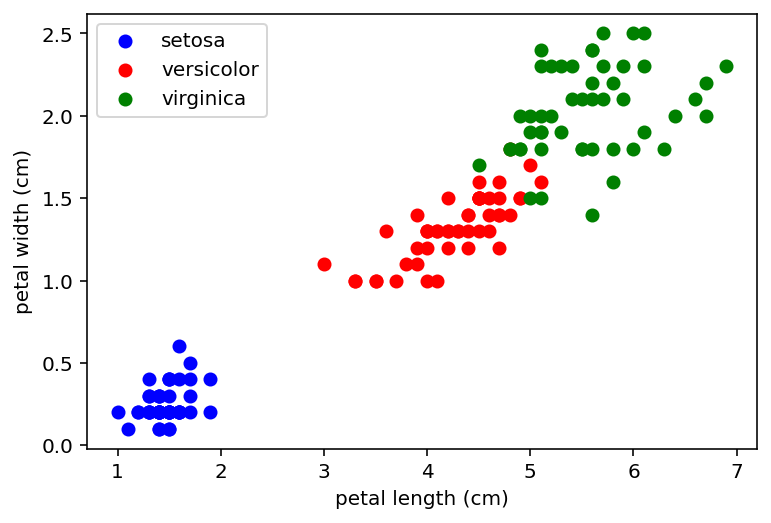

In [45]:
x_index = 2
y_index = 3

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

<div class="alert alert-success">
    <b>HOMEWORK</b>:
     <ul>
      <li>
      **Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**
      </li>
      <li>
      This exercise is a preview of **dimensionality reduction**, which we'll see later.
      </li>
    </ul>
</div>

### HW answer: 
petal width [3] and petal length [2] seem to be the combination of two parameters which maximally separate the three classes: setosa is ideally isolated, but there are some intersections among virginica and versicolor (the graphs below show that they are intersected in each parameter combination)

In [3]:
len(iris.target_names)

3

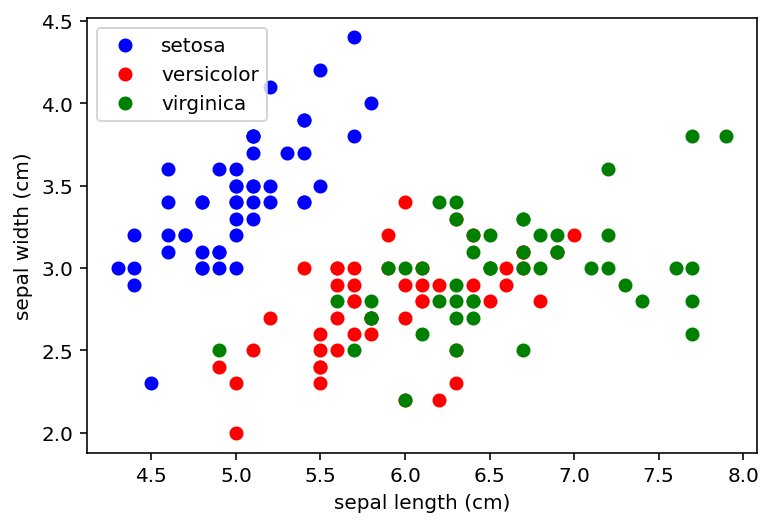

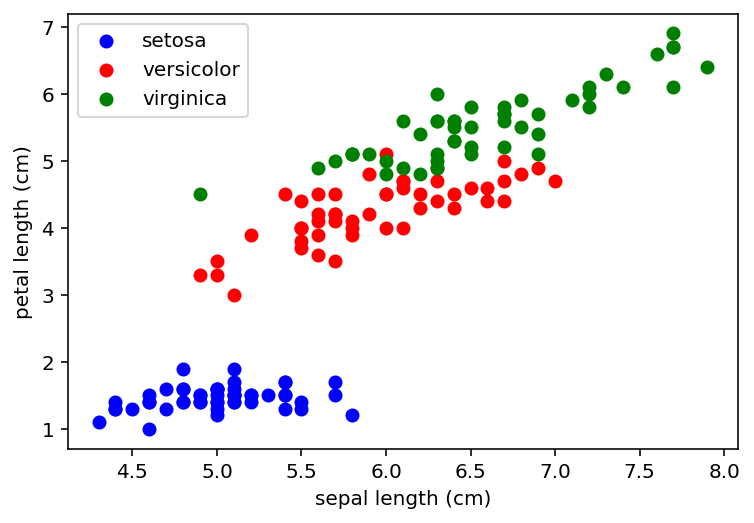

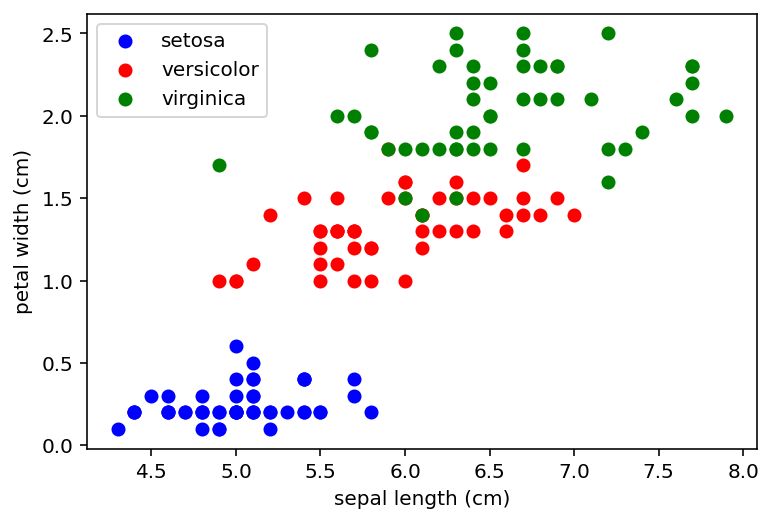

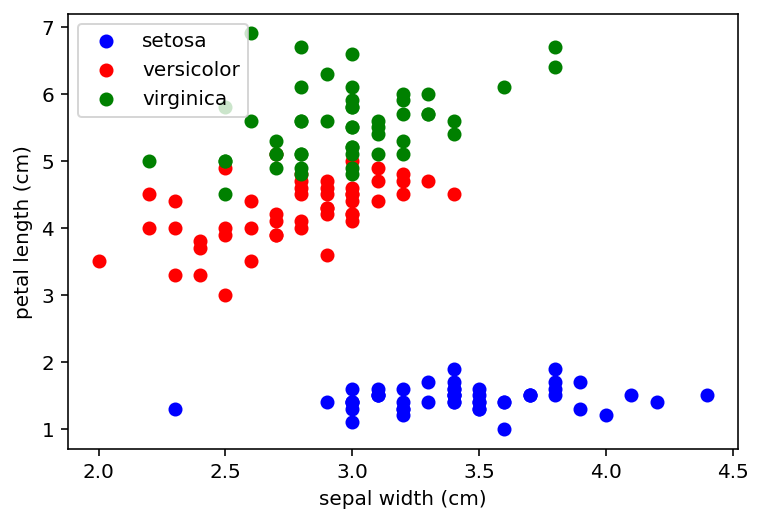

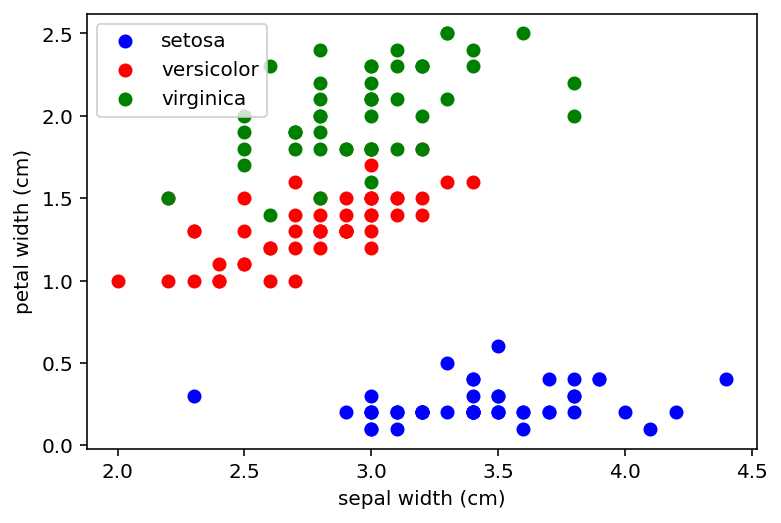

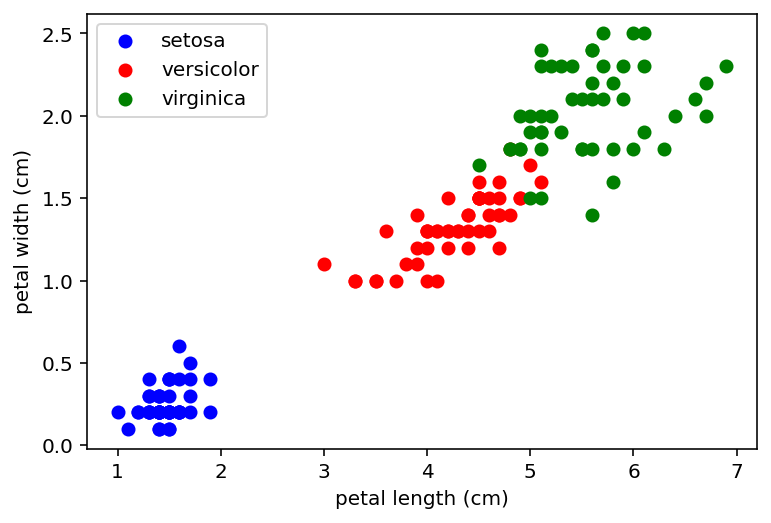

In [44]:
for a in range(0,4):
    for b in range(a+1,4):
        x_index = a
        y_index = b
        
        colors = ['blue', 'red', 'green']
        for label, color in zip(range(len(iris.target_names)), colors):
            plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)
        plt.xlabel(iris.feature_names[x_index])
        plt.ylabel(iris.feature_names[y_index])
        plt.legend(loc='upper left')
        plt.show()

### An aside: scatterplot matrices

Instead of looking at the data, one plot at a time, a common tool that analysts use is called the **scatterplot matrix**.

Scatterplot matrices show scatter plots between all features in the data set, as well as histograms to show the distribution of each feature.

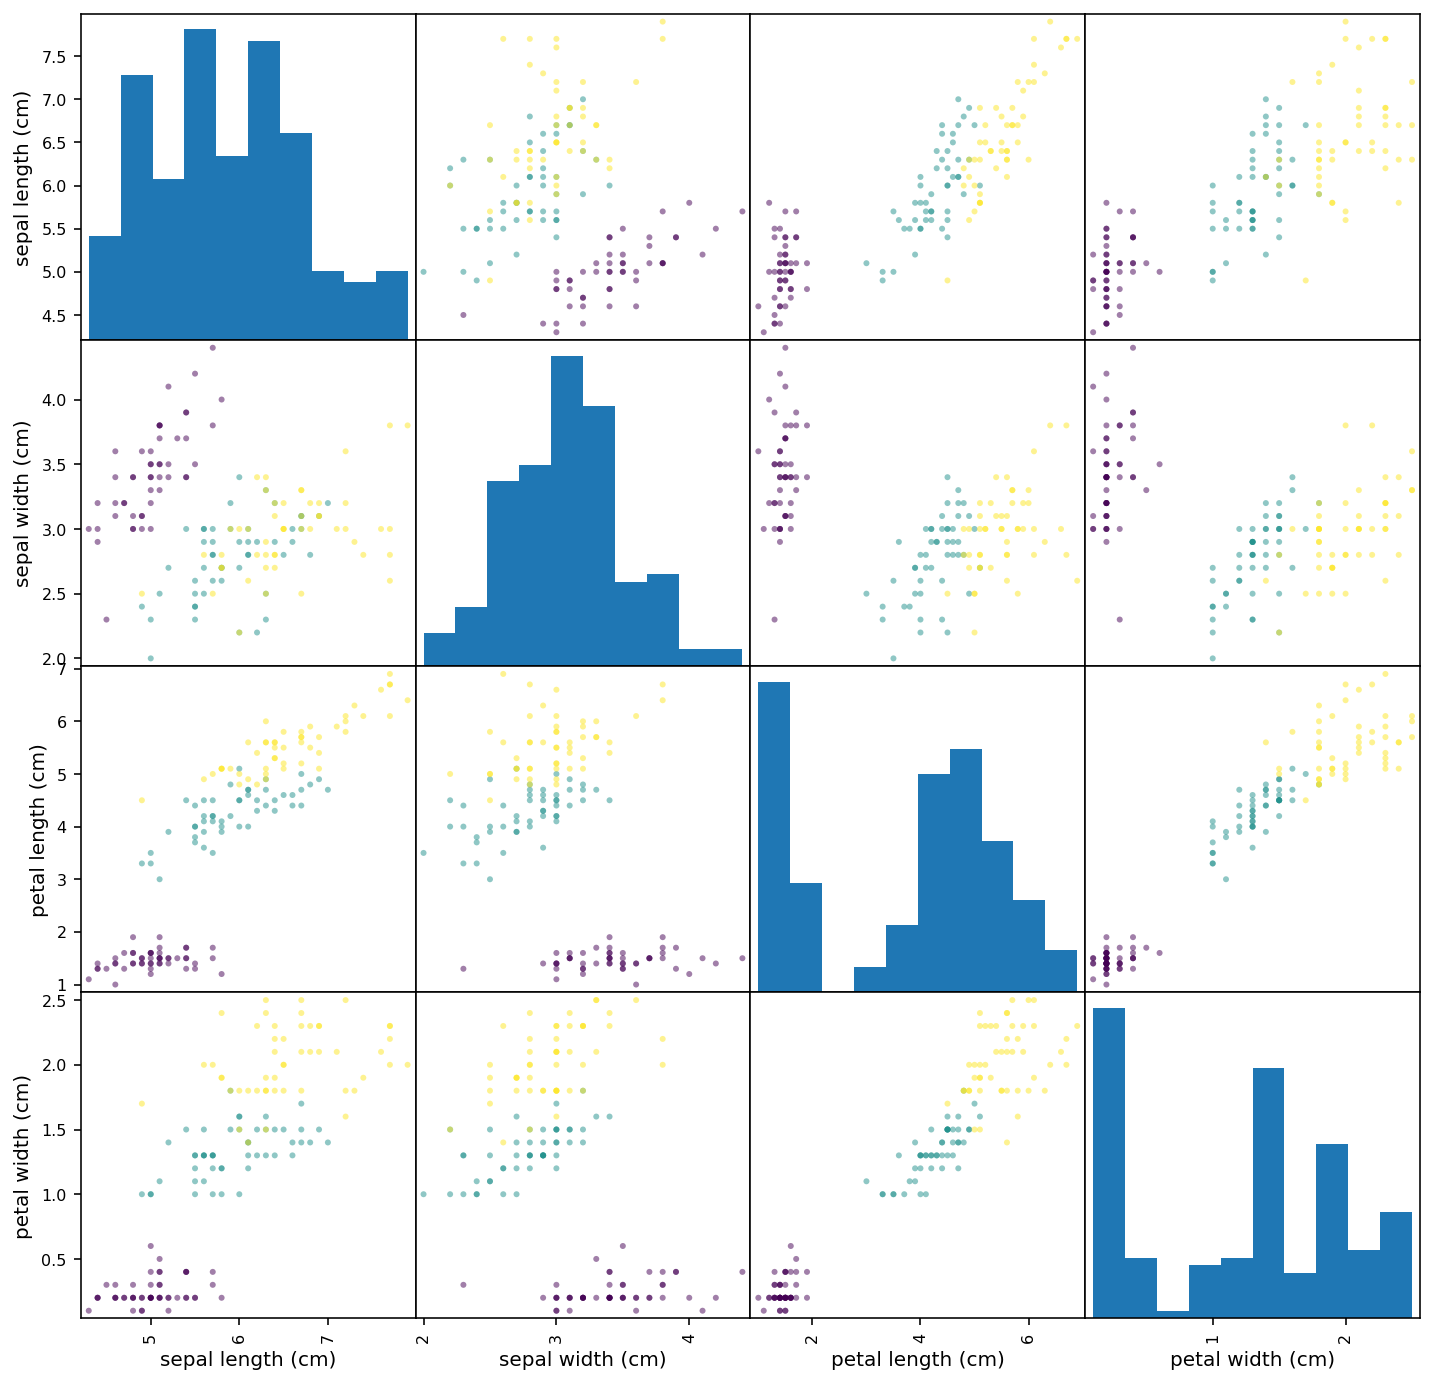

In [46]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(12, 12));

## Other Available Data

[Scikit-learn makes available a host of datasets for testing learning algorithms](http://scikit-learn.org/stable/datasets/#dataset-loading-utilities).
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_<TAB>

or

    datasets.fetch_<TAB>

or

    datasets.make_<TAB>

to see a list of available functions.

In [47]:
from sklearn import datasets

In [49]:
datasets.load_boston

<function sklearn.datasets._base.load_boston(*, return_X_y=False)>

Be warned: many of these datasets are quite large, and can take a long time to download!

If you start a download within the IPython notebook
and you want to kill it, you can use ipython's "kernel interrupt" feature, available in the menu or using
the shortcut ``Ctrl-m i``.

You can press ``Ctrl-m h`` for a list of all ``ipython`` keyboard shortcuts.

## Loading Digits Data (more advanced example, not mandatory)

Now we'll take a look at another dataset, one where we have to put a bit
more thought into how to represent the data.  We can explore the data in
a similar manner as above:

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

In [51]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [52]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [53]:
print(digits.data[0])
print(digits.target)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


The target here is just the digit represented by the data.  The data is an array of
length 64... but what does this data mean?

There's a clue in the fact that we have two versions of the data array:
``data`` and ``images``.  Let's take a look at them:

In [54]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


We can see that they're related by a simple reshaping:

In [55]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


Let's visualize the data.  It's little bit more involved than the simple scatter-plot
we used above, but we can do it rather quickly.

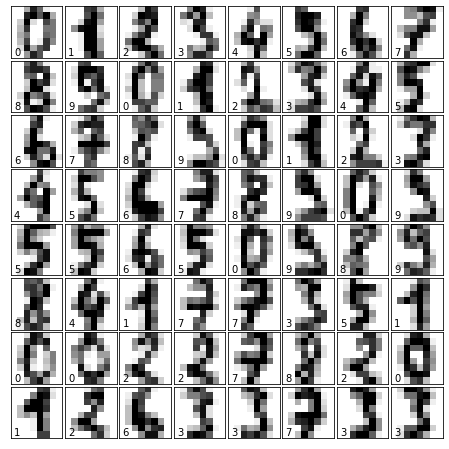

In [22]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We see now what the features mean.  Each feature is a real-valued quantity representing the
darkness of a pixel in an 8x8 image of a hand-written digit.

Even though each sample has data that is inherently two-dimensional, the data matrix flattens
this 2D data into a **single vector**, which can be contained in one **row** of the data matrix.

<div class="alert alert-success">
    <b>HOMEWORK: working with the faces dataset</b>:
     <ul>
      <li>
      Here we'll take a moment for you to explore the datasets yourself.
Later on we'll be using the Olivetti faces dataset.
Take a moment to fetch the data (about 1.4MB), and visualize the faces.
You can copy the code used to visualize the digits above, and modify it for this data.
      </li>
    </ul>
</div>

In [28]:
# fetch the faces data


In [29]:
# Use a script like above to plot the faces image data.
# hint: plt.cm.bone is a good colormap for this data


In [56]:
from sklearn.datasets import fetch_olivetti_faces

In [57]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\molda\scikit_learn_data


In [58]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [70]:
print(faces['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [59]:
n_samples, n_features = faces.data.shape
print((n_samples, n_features))

(400, 4096)


In [60]:
print(faces.data[0])
print(faces.target)

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 

In [61]:
print(faces.data.shape)
print(faces.images.shape)

(400, 4096)
(400, 64, 64)


In [62]:
import numpy as np
print(np.all(faces.images.reshape((400, 4096)) == faces.data))

True


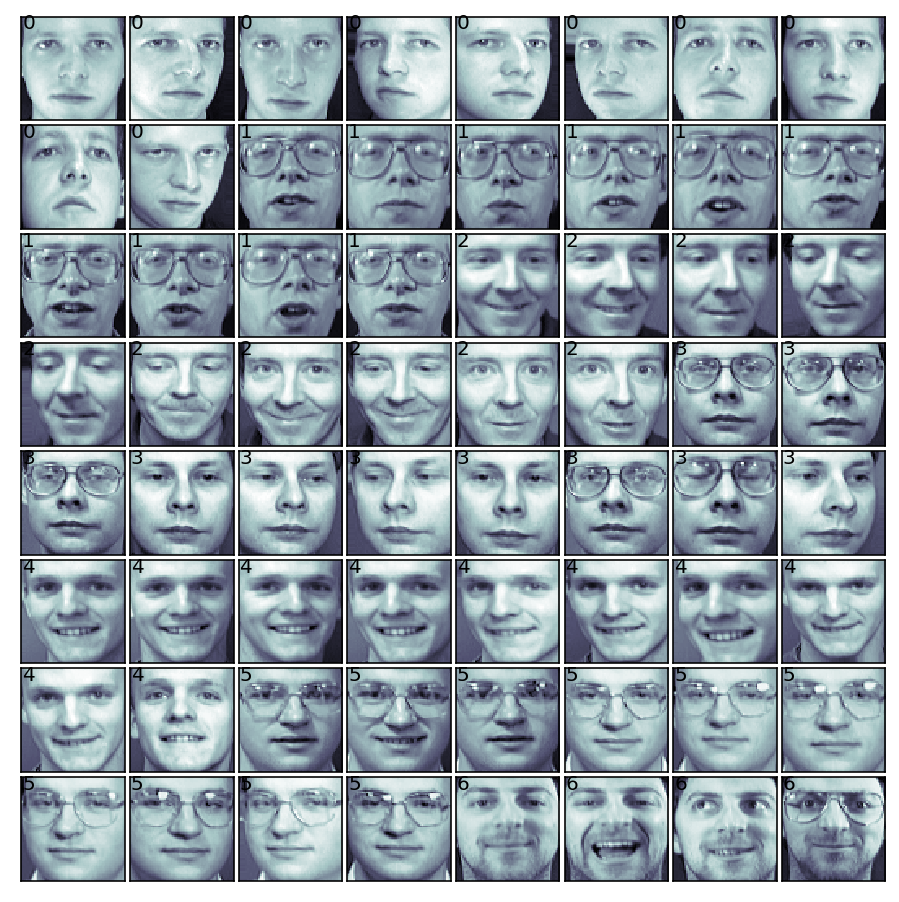

In [69]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(faces.target[i]))

### Solution:

In [67]:
# %load solutions/03A_faces_plot.py

<div class="alert alert-success">
    <b>HOMEWORK: working with the wine dataset</b>:
     <ul>
      <li>
      Explore a new dataset! This time use the wine.csv from the data folder describing 13 numeric attributes of wines coming from three different regions of Italy.

1. What fraction of the wines have a magnesium level above 100 while having a flavanoid concentration below 2.0? How about your favourit?

2. Visualize the distribution of the different attributes. How would you describe these density functions? Without knowing any additional meta information about the types of one, would you expect a mono- or a bi-modal color distribution?

3. How are the different attributes correlated to each other? Create and discuss the correlation matrix of the parameters! What are the 5 most correlated attributes?
      </li>
    </ul>
</div>

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [72]:
### reading the data 
df_wine = pd.read_csv('data/wine.csv')
df_wine.head()

Region  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [3]:
### Add your code

In [213]:
print("1. The percentage of wines with a magnesium level above 100 and flavanoid concentration below 2.0 is","{:.2f}".format(df_wine[(df_wine['Magnesium']>=100) & (df_wine['Flavanoids']<2.0)].shape[0]/df_wine.shape[0]*100),'%')

1. The percentage of wines with a magnesium level above 100 and flavanoid concentration below 2.0 is 16.29 %


In [241]:
print("1. The percentage of wines with an alcohol level below 12.0 and total phenols concentration below 3.0 is","{:.2f}".format(df_wine[(df_wine['Alcohol']<12.0) & (df_wine['Total phenols']<3.0)].shape[0]/df_wine.shape[0]*100),'%')

1. The percentage of wines with an alcohol level below 12.0 and total phenols concentration below 3.0 is 8.43 %


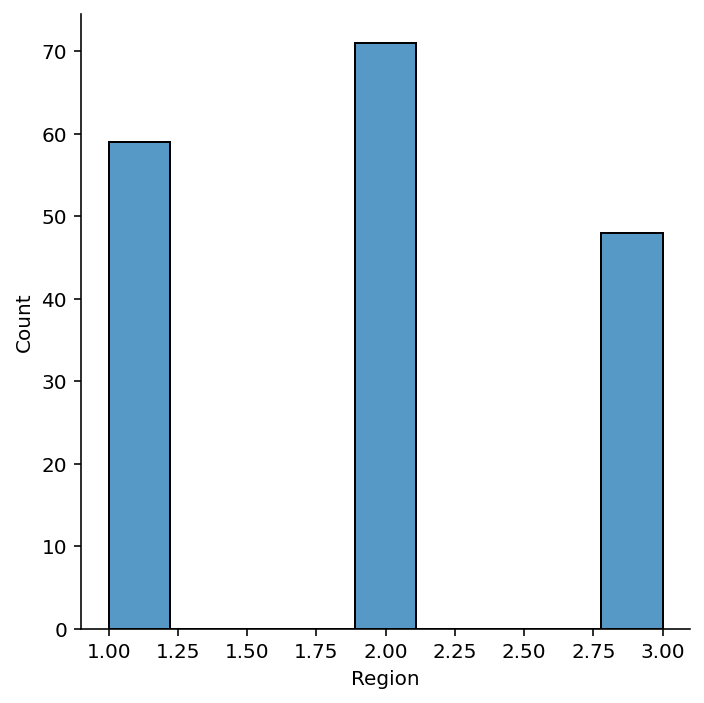

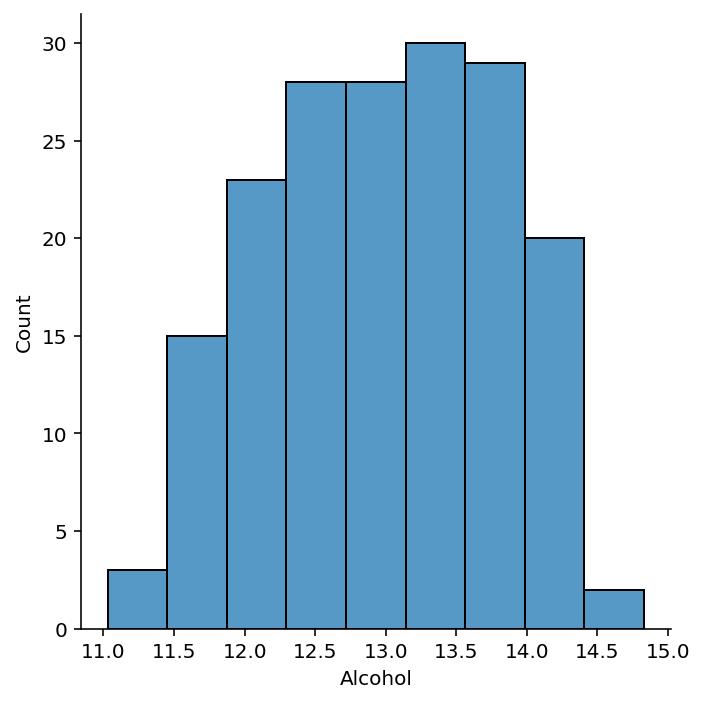

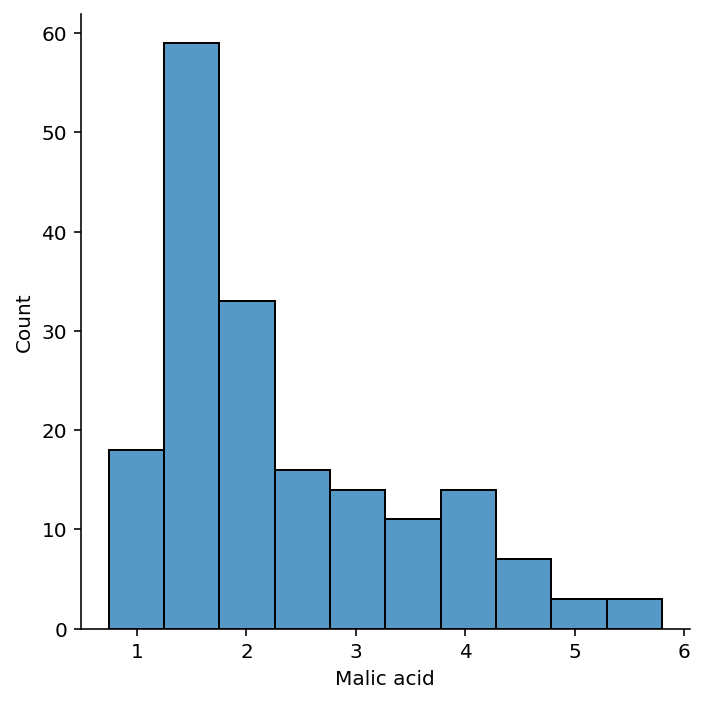

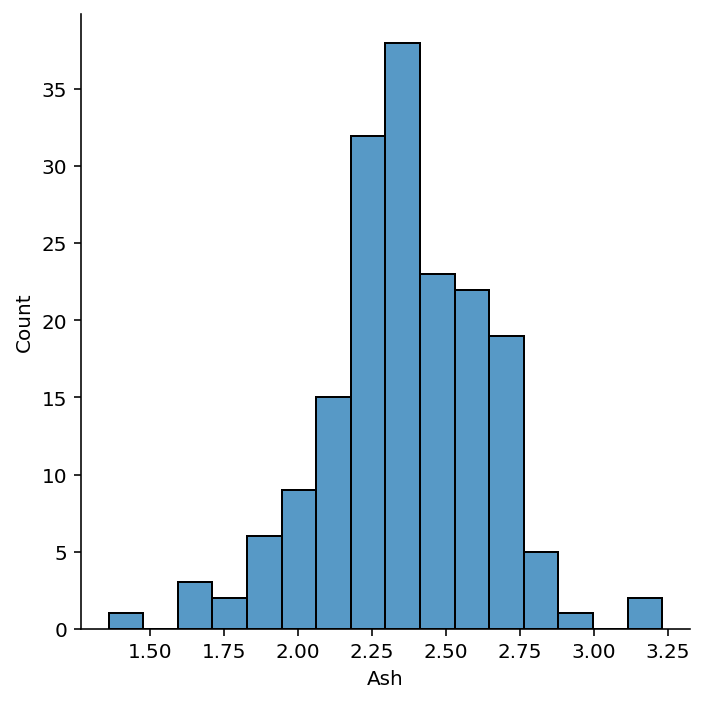

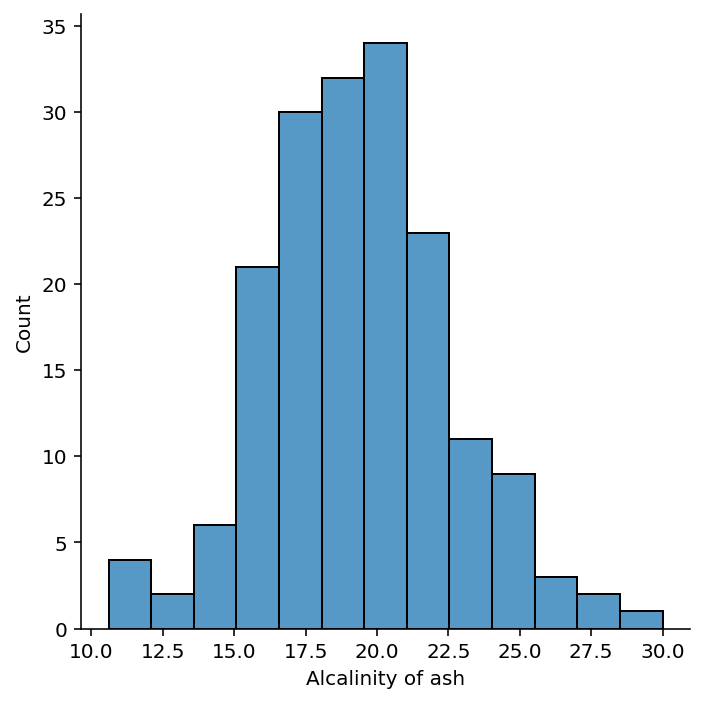

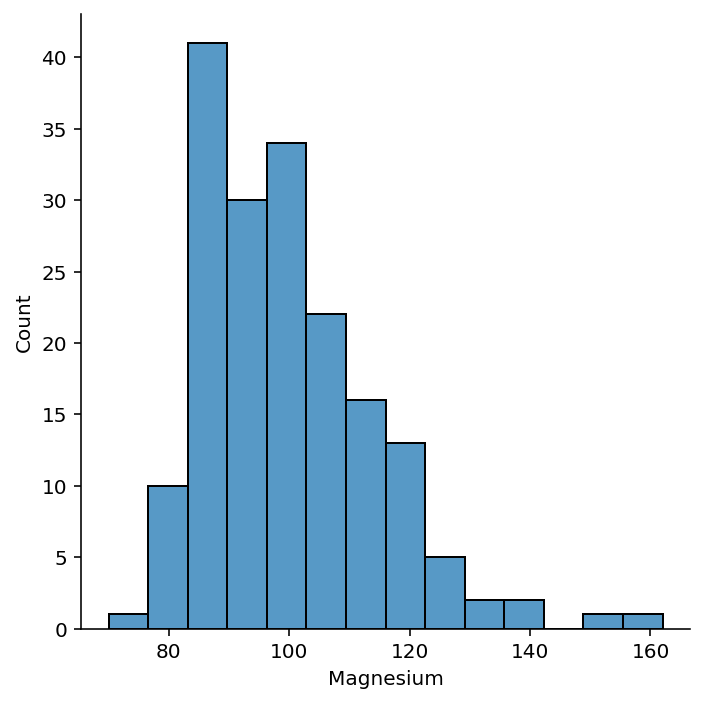

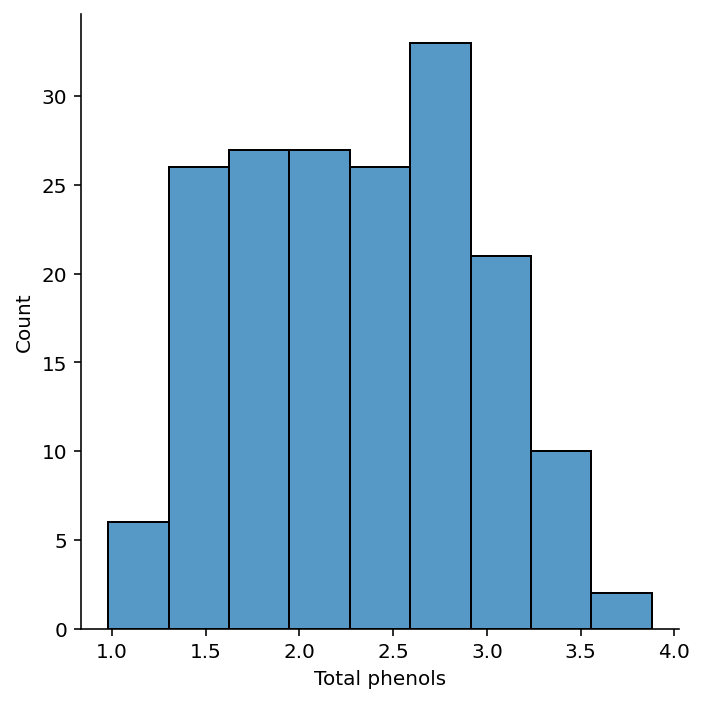

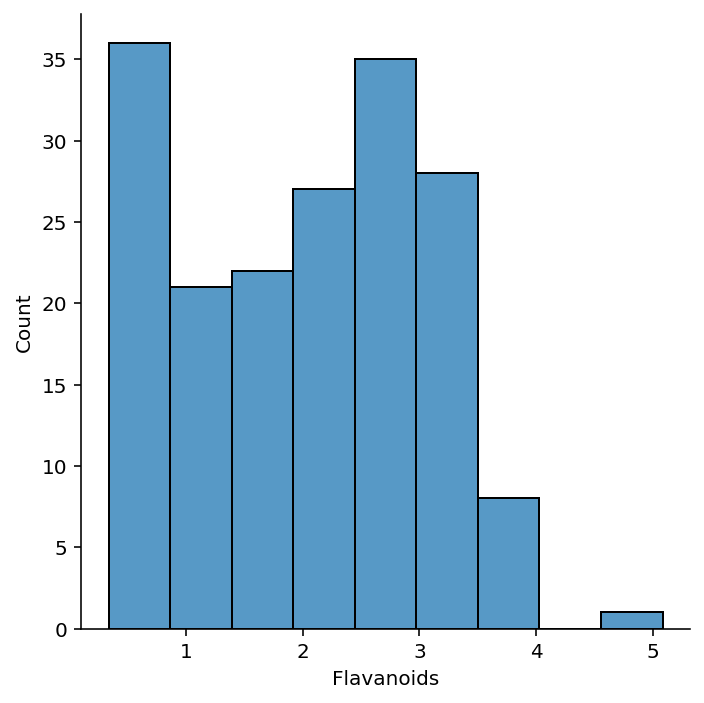

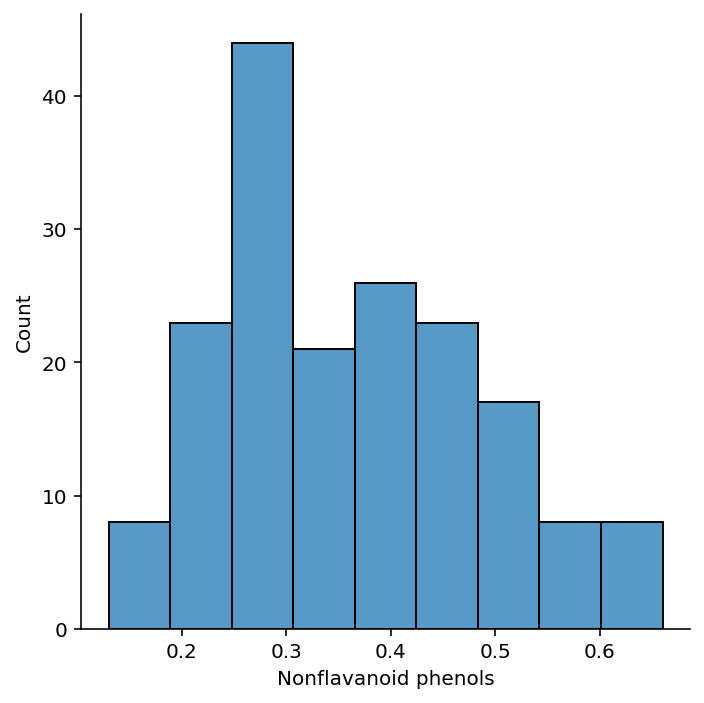

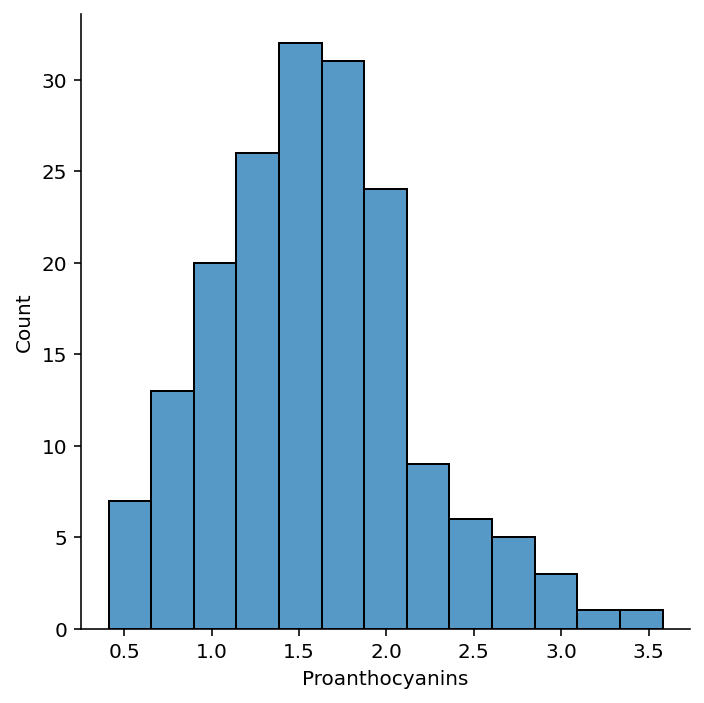

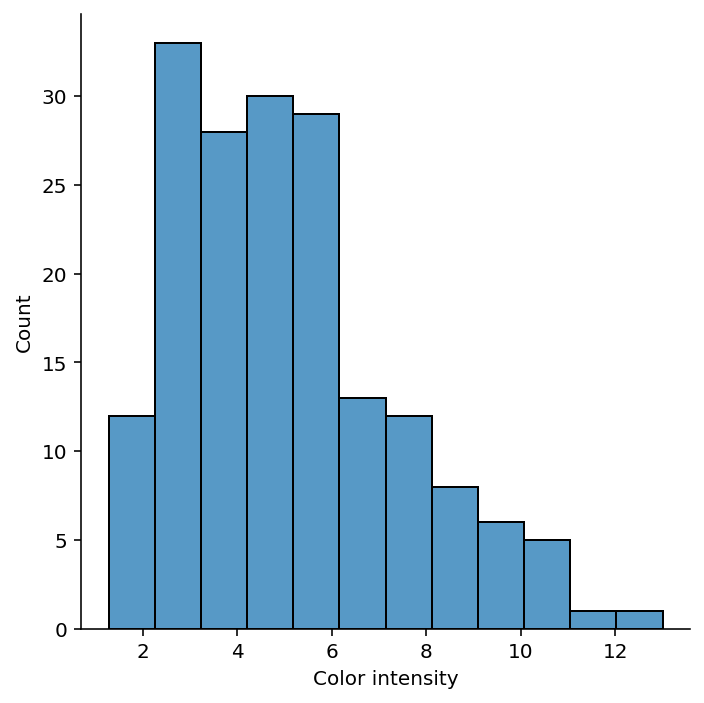

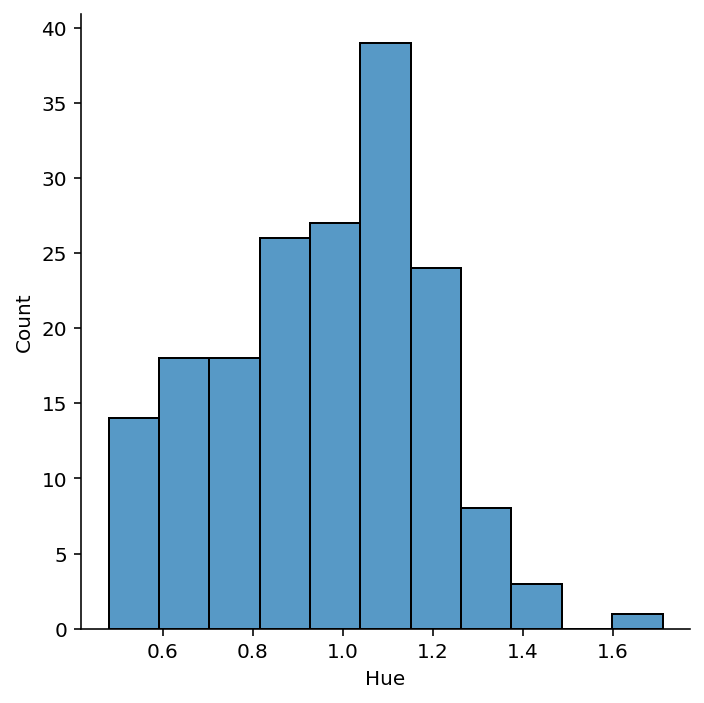

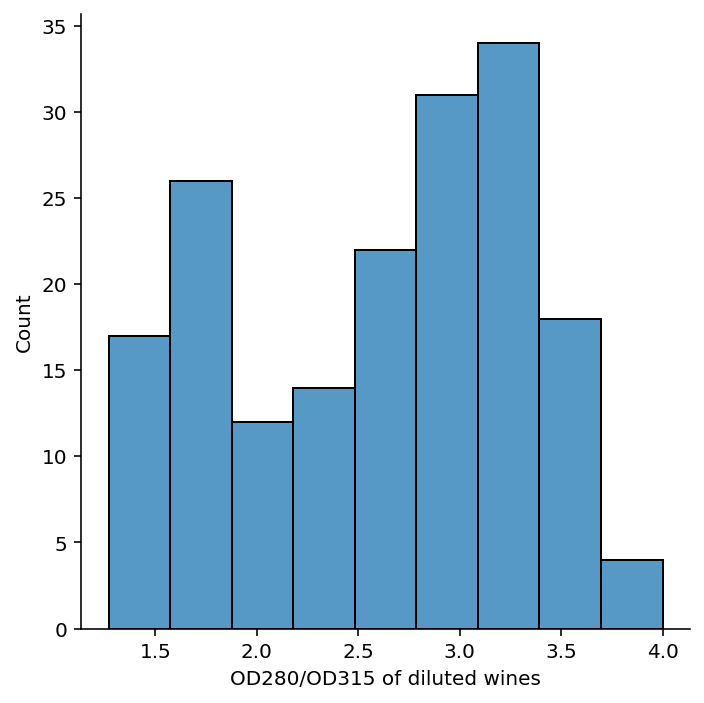

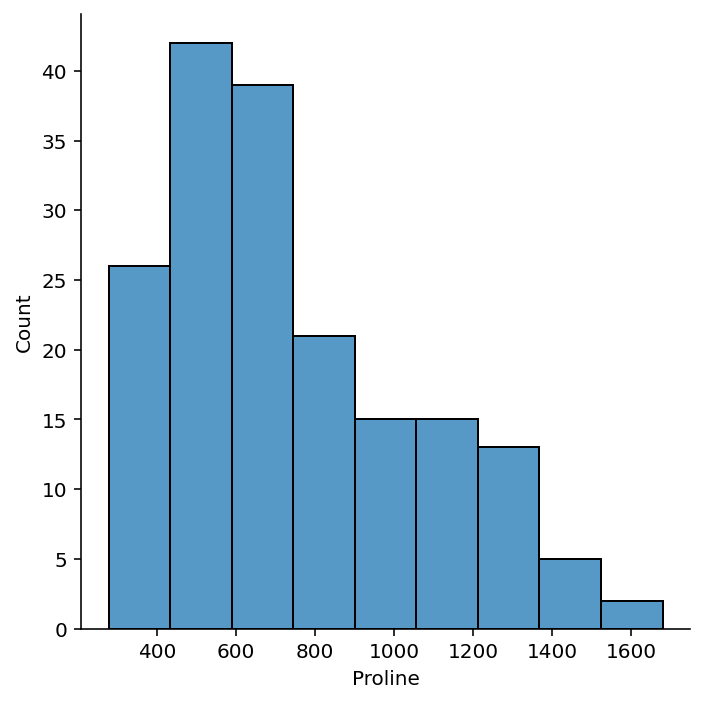

In [156]:
for col in df_wine.columns:
    sns.displot(df_wine, x=col)


Histograms of the features show different patterns. Mostly they are skewed, with one mode (data peak). Flavanoids and magnesiom have two peaks which should be the distinguishing feature for certain region. Simply the distribution of the features is weak for making assumptions of the Region. So it's better to look at distributions by type. Figures below actually show that three regions actually have specific distributions that makes them distinguishable:

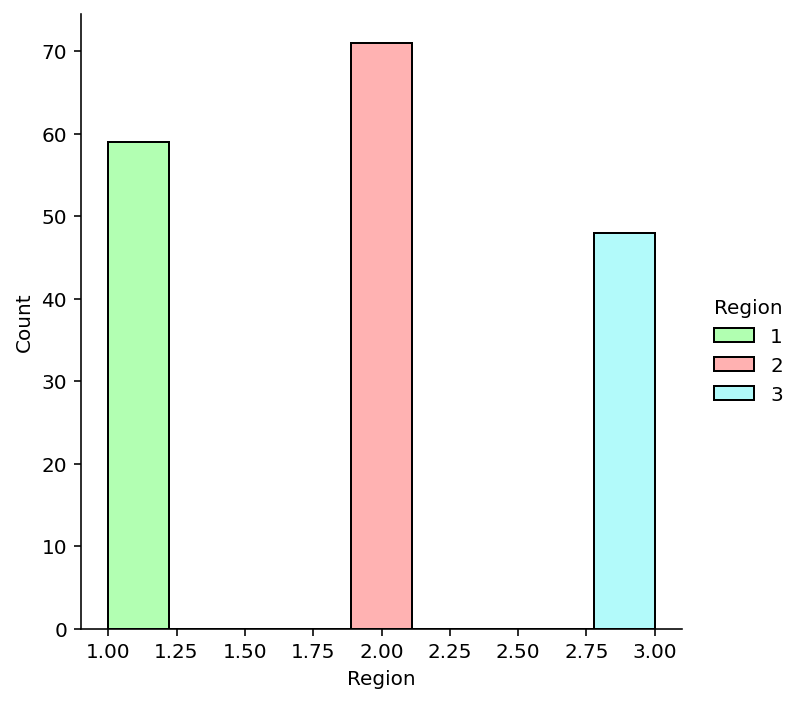

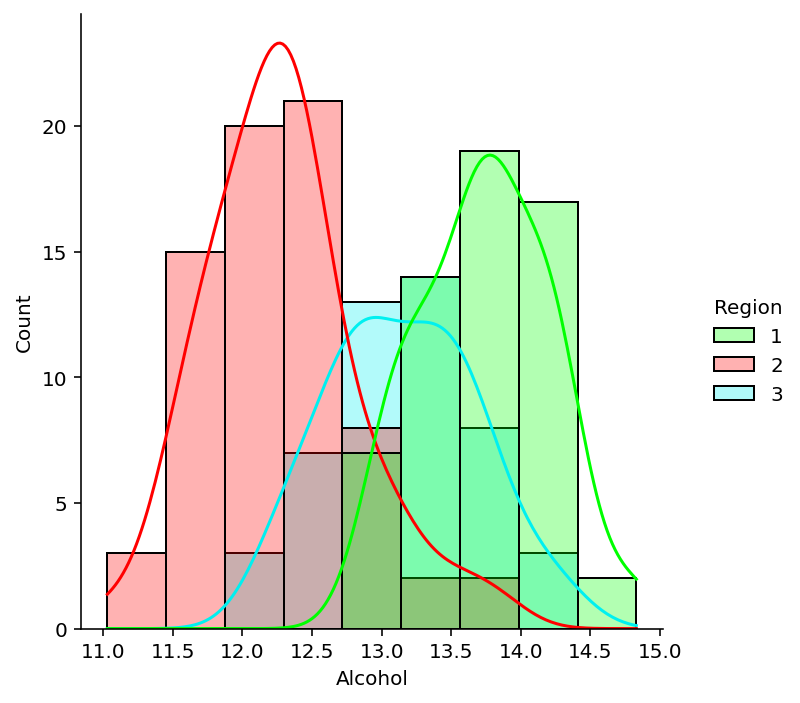

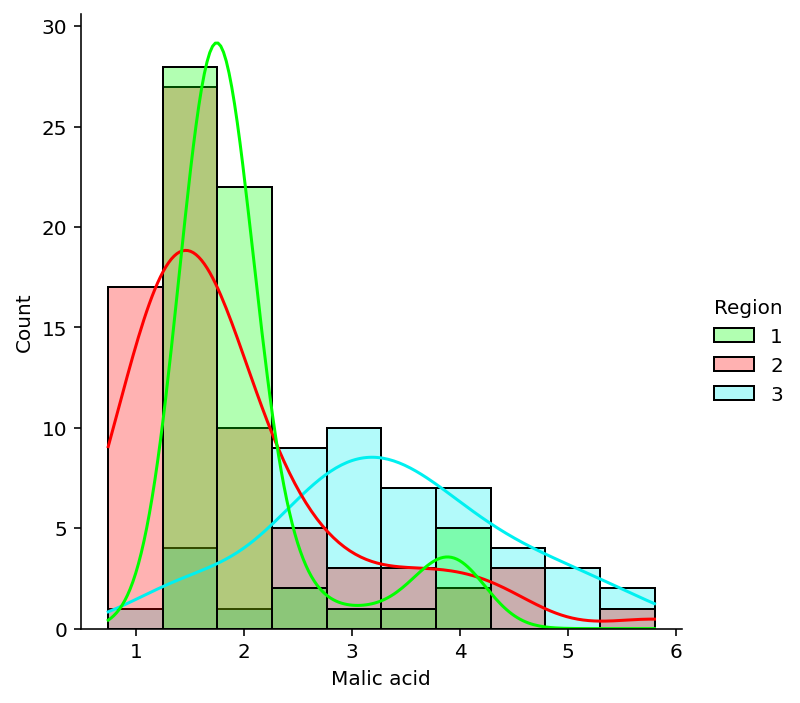

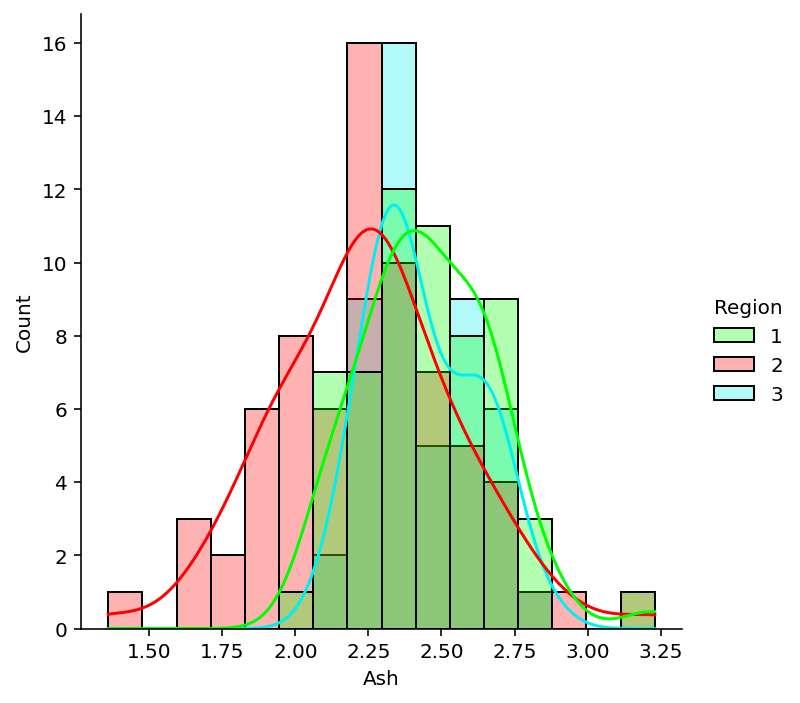

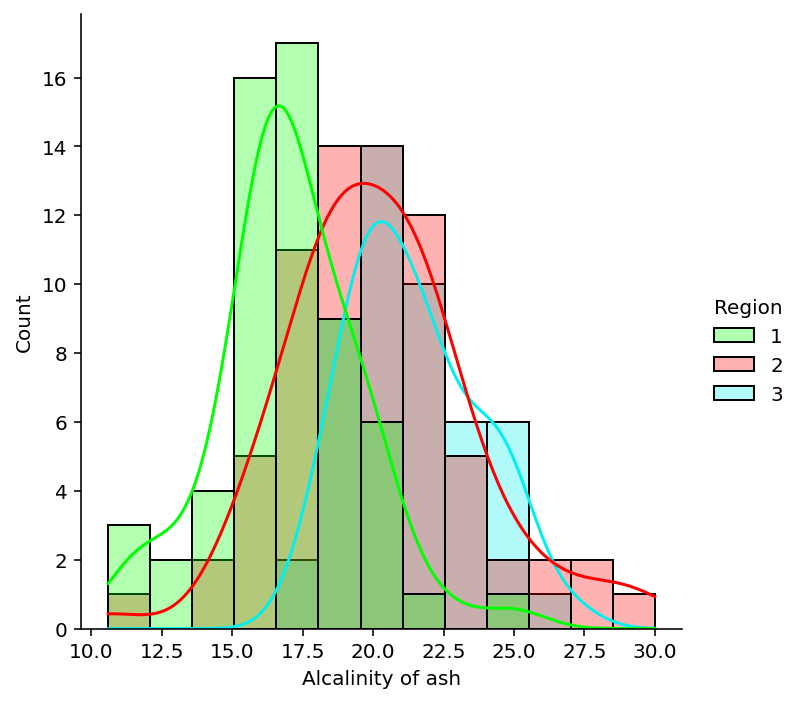

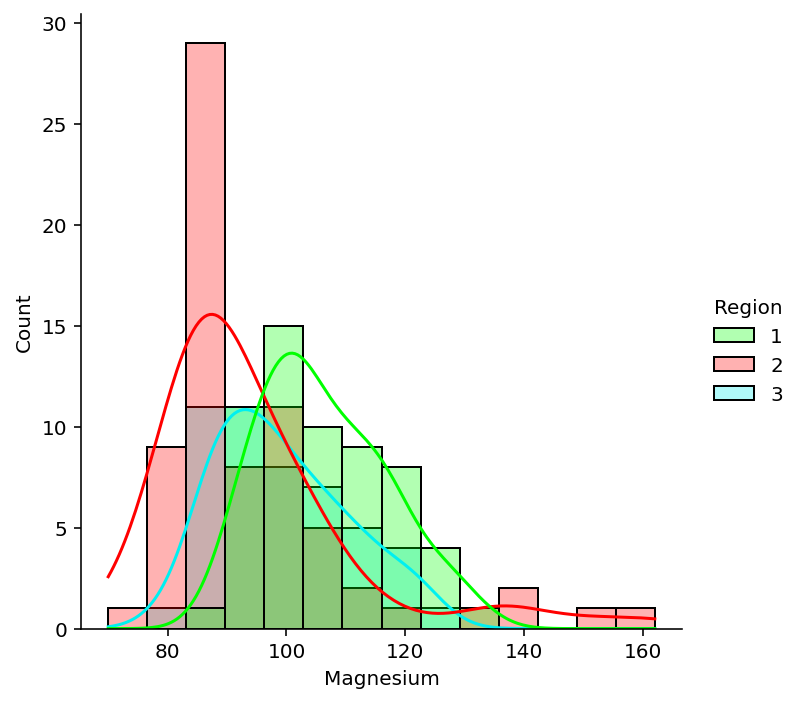

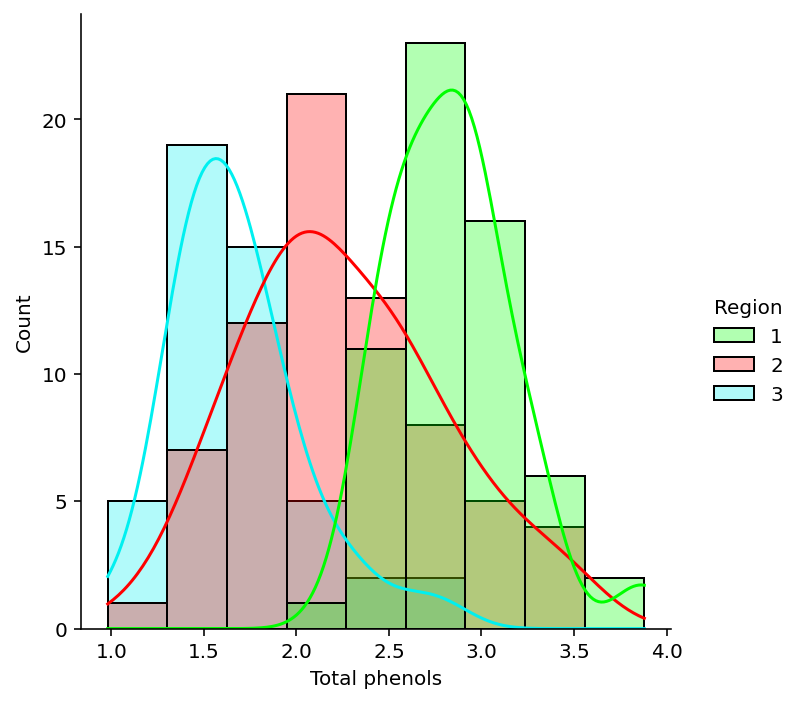

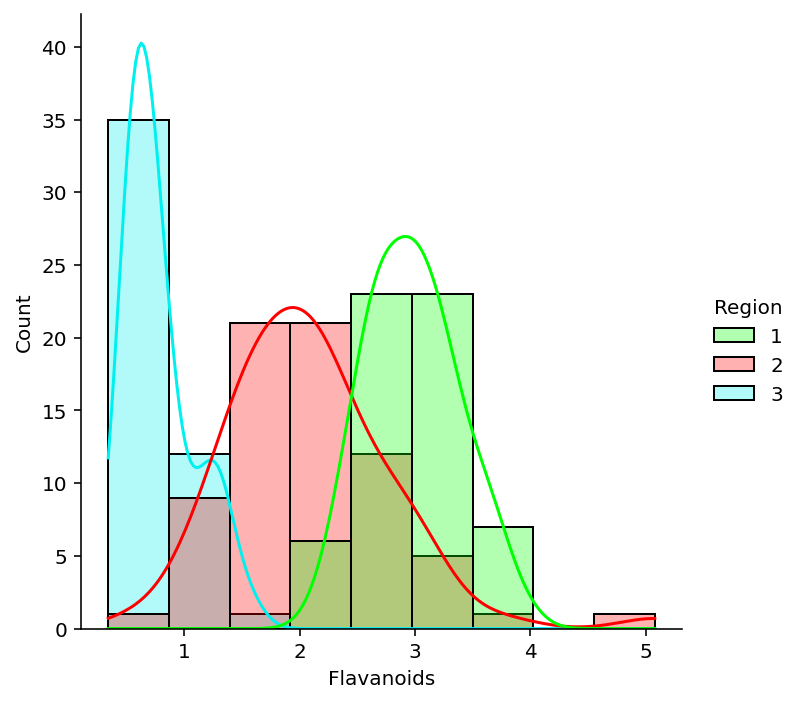

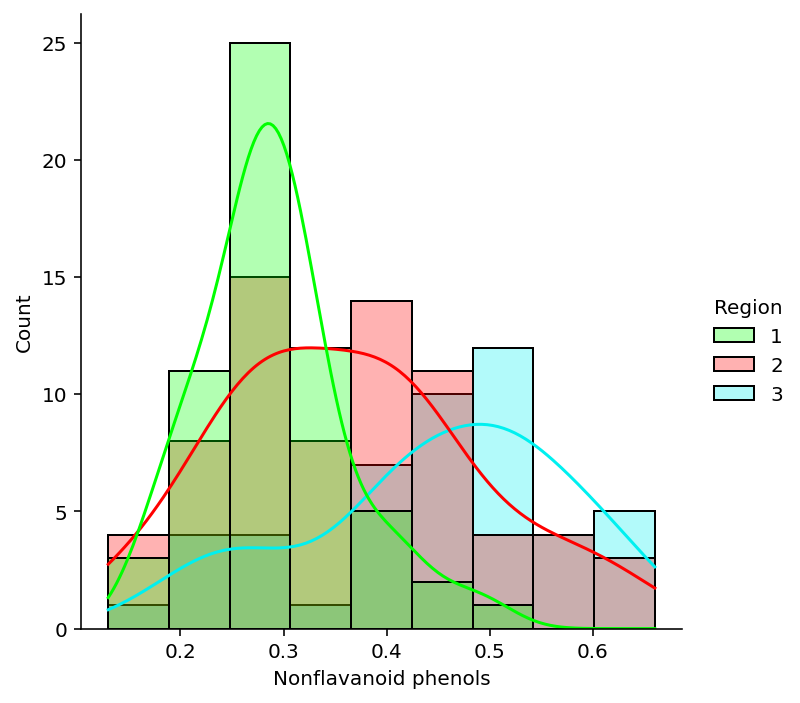

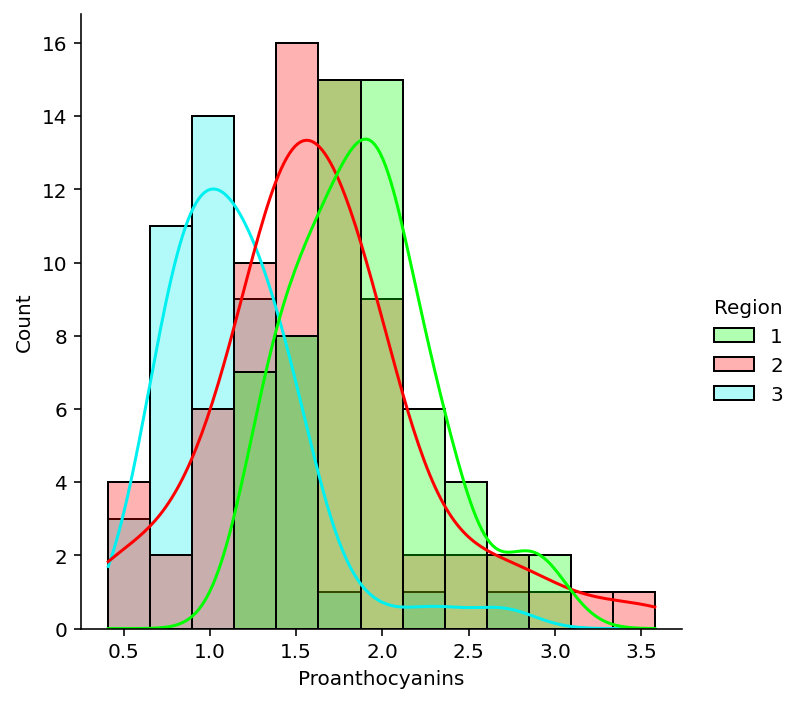

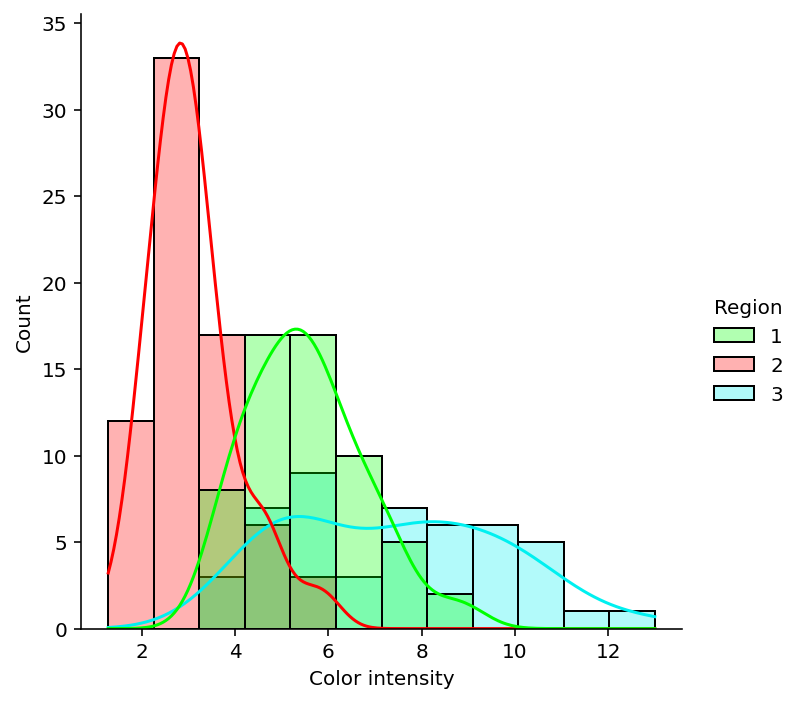

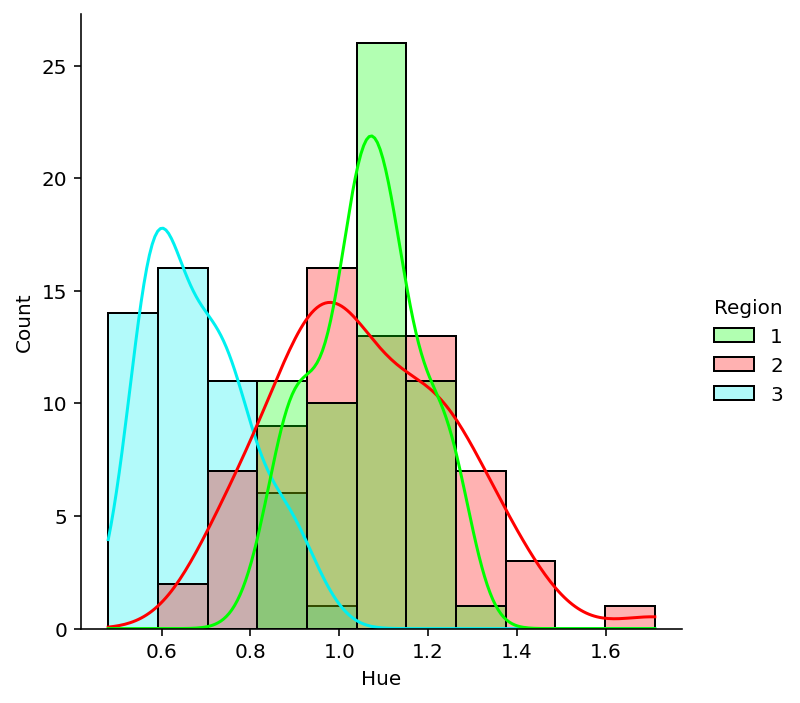

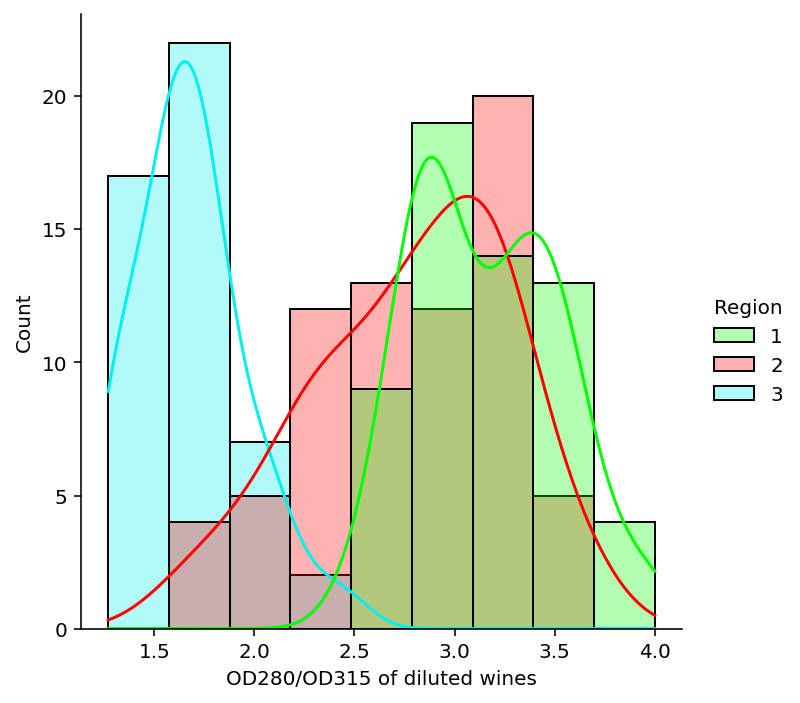

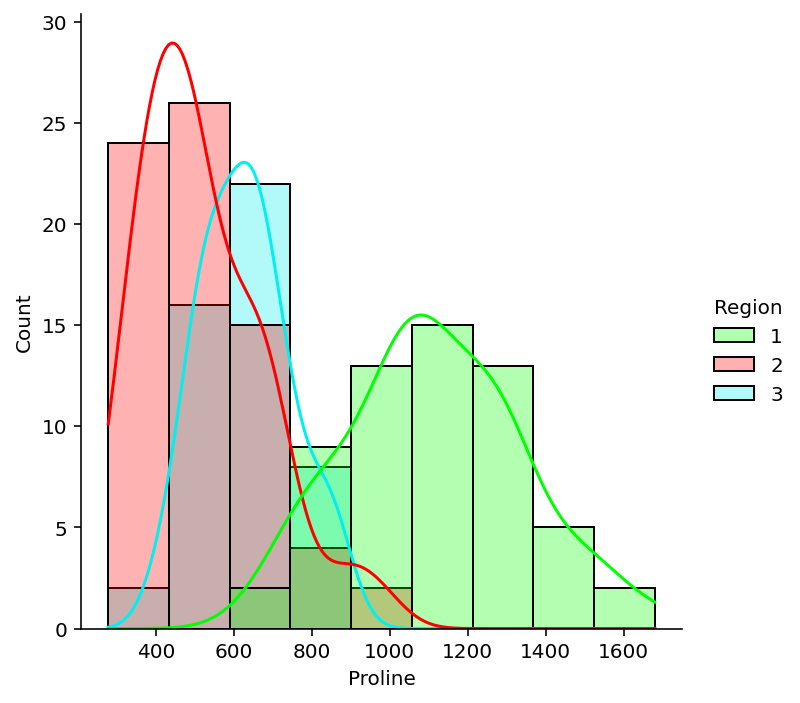

In [184]:
for col in df_wine.columns:
    sns.displot(df_wine, x=col, hue='Region', palette=["#00ff00", "#ff0000", "#00f0f0"], alpha=0.3, kde=True)

In [176]:
X = df_wine.drop("Region",axis=1)   #Feature Matrix
Y = df_wine["Region"]          #Target Variable

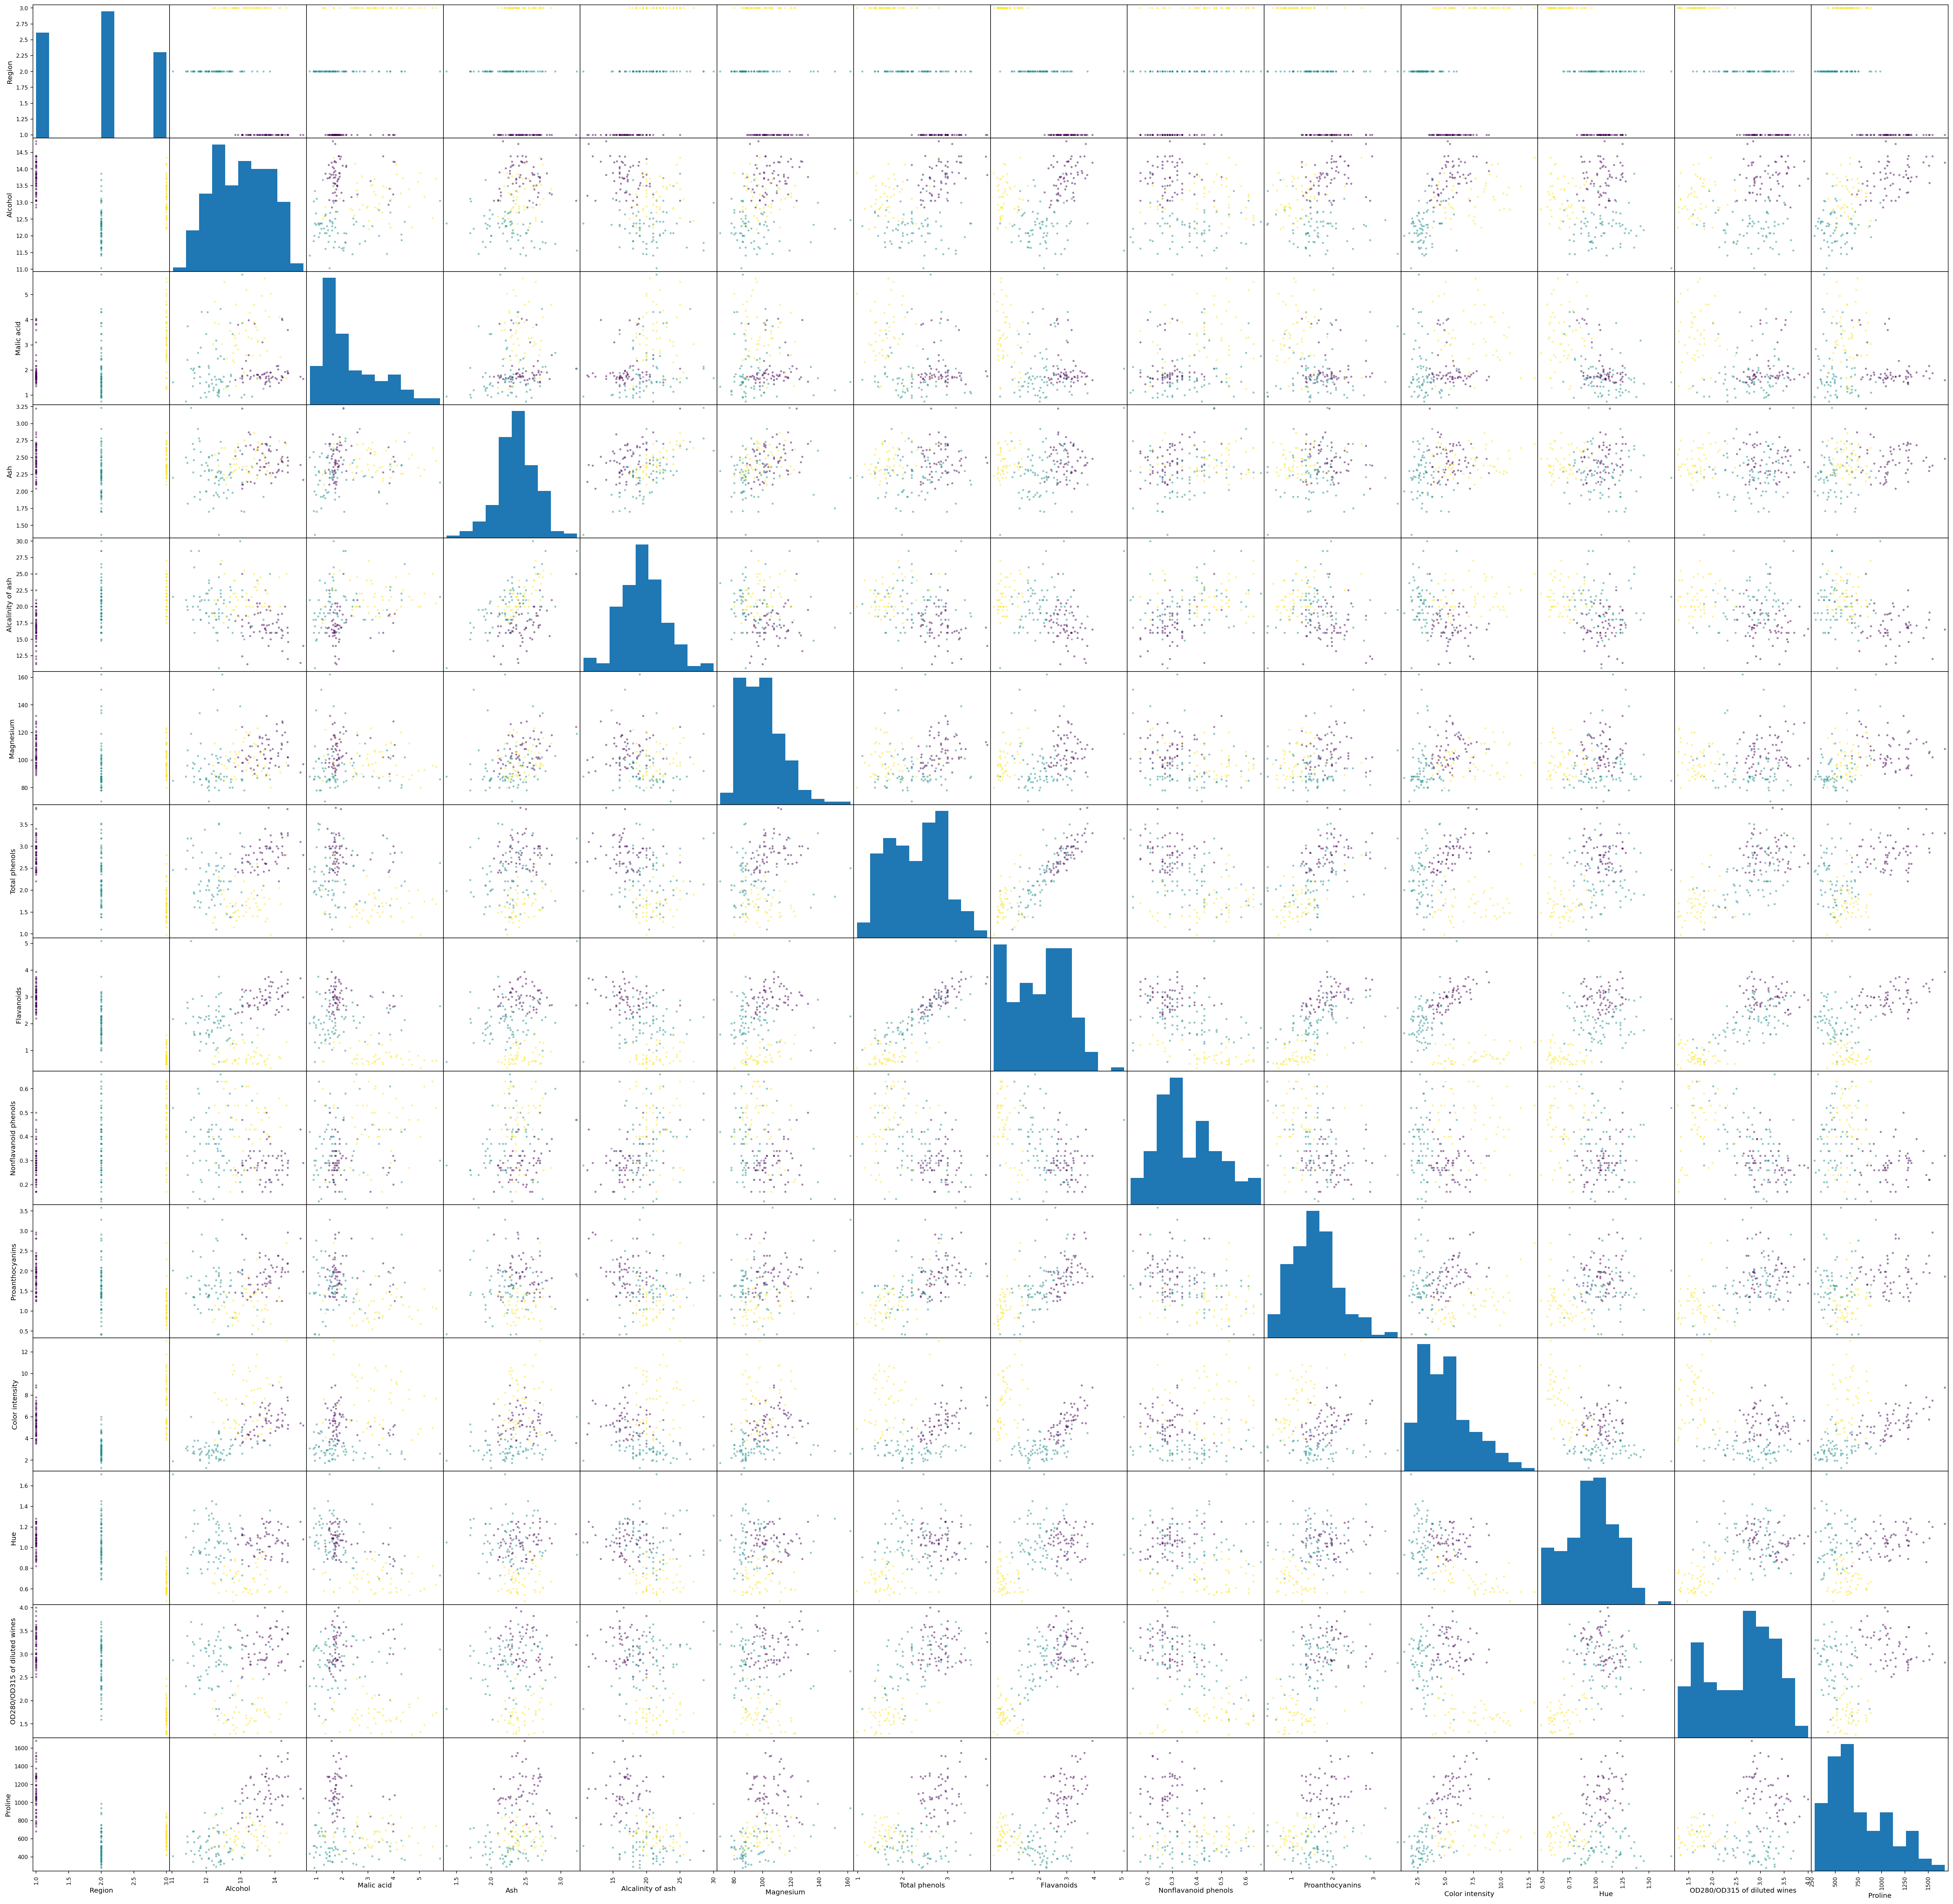

In [180]:
pd.plotting.scatter_matrix(df_wine, c=Y, figsize=(50, 50));

In [220]:
corrM = X.corr()

corrM

Alcohol  Malic acid       Ash  \
Alcohol                       1.000000    0.094397  0.211545   
Malic acid                    0.094397    1.000000  0.164045   
Ash                           0.211545    0.164045  1.000000   
Alcalinity of ash            -0.310235    0.288500  0.443367   
Magnesium                     0.270798   -0.054575  0.286587   
Total phenols                 0.289101   -0.335167  0.128980   
Flavanoids                    0.236815   -0.411007  0.115077   
Nonflavanoid phenols         -0.155929    0.292977  0.186230   
Proanthocyanins               0.136698   -0.220746  0.009652   
Color intensity               0.546364    0.248985  0.258887   
Hue                          -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines  0.072343   -0.368710  0.003911   
Proline                       0.643720   -0.192011  0.223626   

                              Alcalinity of ash  Magnesium  Total phenols  \
Alcohol                               -0.310235   0.270798       0.289101   
Malic acid                             0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity of ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
OD280/OD315 of diluted wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid phenols  \
Alcohol                         0.236815             -0.155929   
Malic acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity of ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280/OD315 of diluted wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color intensity       Hue  \
Alcohol                              0.136698         0.546364 -0.071747   
Malic acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity of ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins                      1.000000        -0.025250  0.295544   
Color intensity                     -0.025250         1.000000 -0.521813   
Hue                                  0.295544        -0.521813  1.000000   
OD280/OD315 of diluted wines         0.519067        -0.428815  0.565468   
Proline                              0.330417         0.316100  0.236183   

                              OD280/OD315 of diluted wines   Prol

<AxesSubplot:>

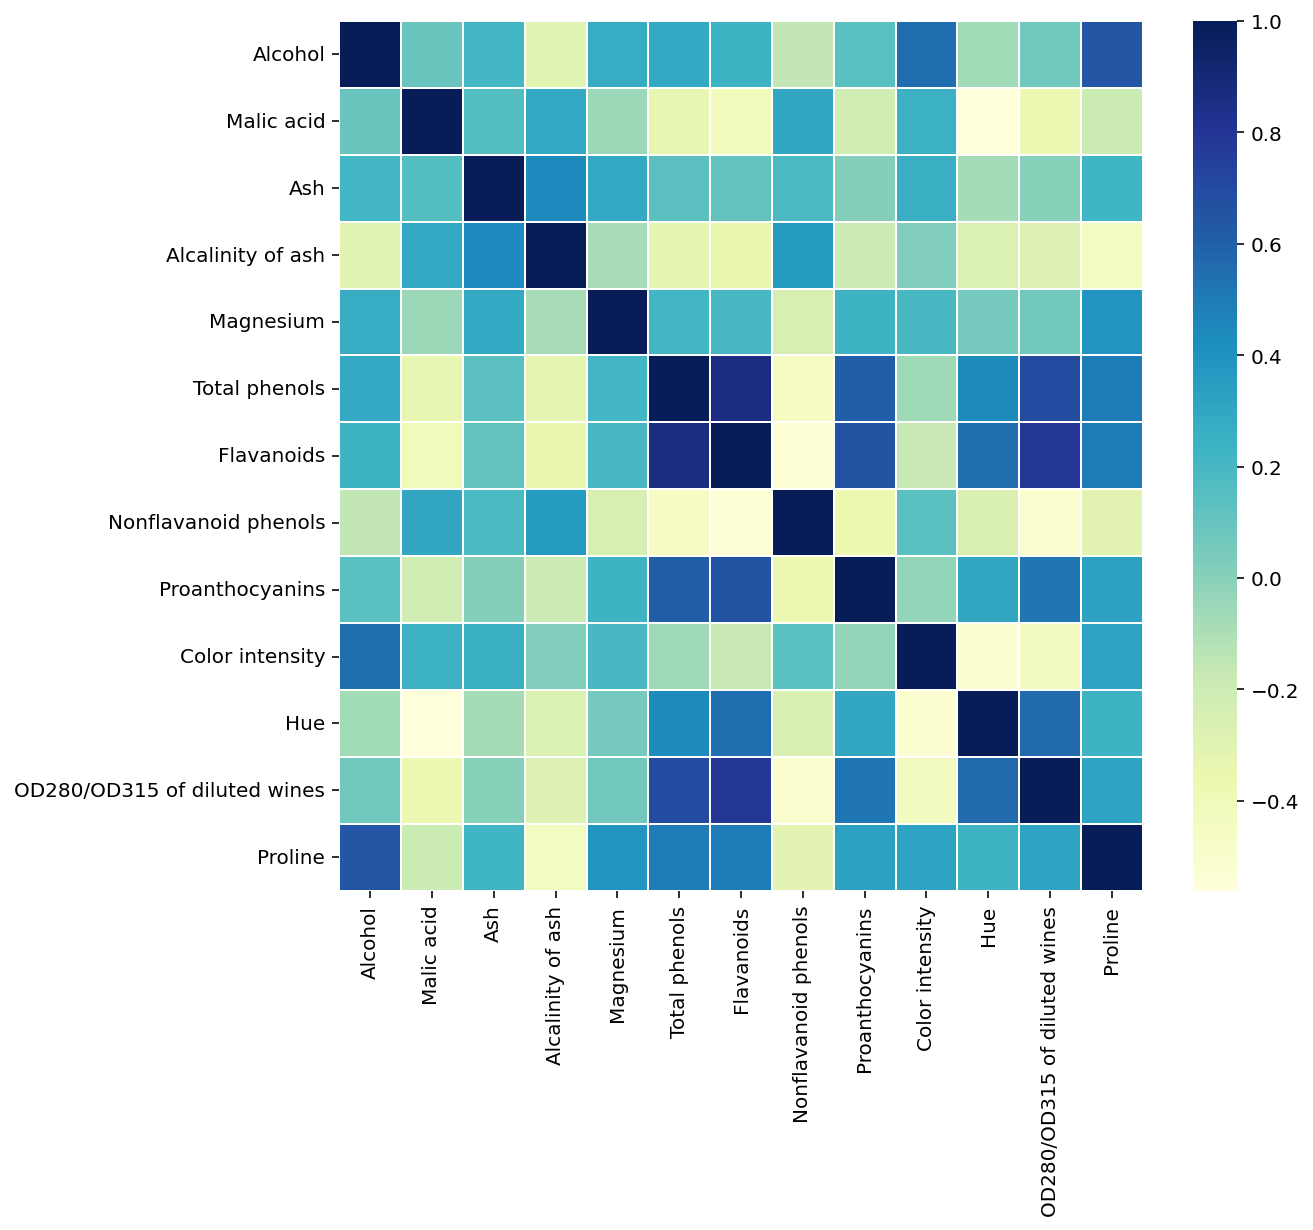

In [221]:
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrM, ax=ax, cmap="YlGnBu", linewidths = 0.1)

There are both positively and negatively correlated attributes. It can be seen that their values are substantial. There are some attributes with pretty high absolute correlation. Top 5 are listed below:

In [239]:
corrM.unstack().abs().drop_duplicates().sort_values(ascending=False)[1:6]

Total phenols  Flavanoids                      0.864564
Flavanoids     OD280/OD315 of diluted wines    0.787194
Total phenols  OD280/OD315 of diluted wines    0.699949
Flavanoids     Proanthocyanins                 0.652692
Alcohol        Proline                         0.643720
dtype: float64

In [244]:
corrM.unstack().abs().drop_duplicates().sort_values(ascending=False)[1:15]

Total phenols         Flavanoids                      0.864564
Flavanoids            OD280/OD315 of diluted wines    0.787194
Total phenols         OD280/OD315 of diluted wines    0.699949
Flavanoids            Proanthocyanins                 0.652692
Alcohol               Proline                         0.643720
Total phenols         Proanthocyanins                 0.612413
Hue                   OD280/OD315 of diluted wines    0.565468
Malic acid            Hue                             0.561296
Alcohol               Color intensity                 0.546364
Flavanoids            Hue                             0.543479
                      Nonflavanoid phenols            0.537900
Color intensity       Hue                             0.521813
Proanthocyanins       OD280/OD315 of diluted wines    0.519067
Nonflavanoid phenols  OD280/OD315 of diluted wines    0.503270
dtype: float64